In [1]:
#!/usr/bin/env python
from __future__ import print_function
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
     
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.models import load_model

C:\Users\Andre\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
path = '.'
files = os.listdir(path)
for name in files:
    print(name)

path = 'train/'
files = os.listdir(path)
counter = 0
for name in files:
    if(counter>5):
        break
    counter+=1
    print(name)
    
df = pd.read_csv('labels.csv')
df.head()

# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

C:\Users\Andre\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
X_train.shape
X_train.dtype
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [4]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)
print(X_train.shape)
X_train

(60000, 28, 28, 1)


array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


In [5]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [6]:
print (y_train[:10])
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
Y_train

[5 0 4 1 9 2 1 3 1 4]


array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [7]:
model = Sequential()
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [8]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))

In [9]:
print (model.input_shape)

(None, 28, 28, 1)


In [11]:
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [12]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [13]:
model.fit(X_train, Y_train, 
          batch_size=32, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 350s 6ms/step - loss: 0.2114 - acc: 0.9355
Epoch 2/10
60000/60000 [==============================] - 320s 5ms/step - loss: 0.0878 - acc: 0.9741
Epoch 3/10
60000/60000 [==============================] - 301s 5ms/step - loss: 0.0669 - acc: 0.9795
Epoch 4/10
60000/60000 [==============================] - 518s 9ms/step - loss: 0.0546 - acc: 0.9829
Epoch 5/10
60000/60000 [==============================] - 664s 11ms/step - loss: 0.0471 - acc: 0.9857
Epoch 6/10
60000/60000 [==============================] - 301s 5ms/step - loss: 0.0415 - acc: 0.9870
Epoch 7/10
60000/60000 [==============================] - 299s 5ms/step - loss: 0.0366 - acc: 0.9888
Epoch 8/10
60000/60000 [==============================] - 685s 11ms/step - loss: 0.0335 - acc: 0.9893
Epoch 9/10
60000/60000 [==============================] - 306s 5ms/step - loss: 0.0301 - acc: 0.9907
Epoch 10/10
60000/60000 [==============================] - 317s 5ms/step - loss: 0.0287 -

In [14]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_test.shape

(10000, 28, 28)

In [19]:
prediction = model.predict(X_test, batch_size=None, verbose=0)

prediction:  4
image:


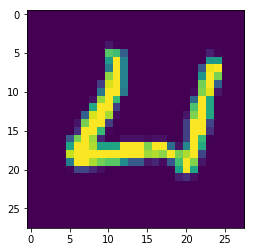

In [36]:
index = 33
k = np.array(X_test[index])
y= k.reshape(1,28,28,1)

#print(prediction)
print ("prediction: ",model.predict_classes(y)[0])
print ("image:")
plt.imshow(X_test[index])

In [22]:
model.save("number_model.h5")

In [2]:
model = load_model("number_model.h5")

In [3]:
index = 124
k = np.array(X_test[index])
y= k.reshape(1,28,28,1)
prediction = model.predict(y, verbose = 0)

#print(prediction)
print ("prediction: ",model.predict_classes(y)[0])
print ("image:")
plt.imshow(X_test[index])

NameError: name 'X_test' is not defined

In [18]:
print(model)

(28, 28)
1


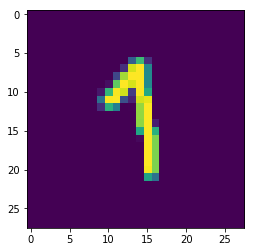

In [31]:
# Attempt to load images from files to classify them
import cv2

img = cv2.imread('test_img4.png')
img = cv2.bitwise_not(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, (28, 28))
print(img.shape)


k = np.array(img)
y= k.reshape(1,28,28,1)

print(model.predict_classes(y)[0])
plt.imshow(img)
#plt.imshow(img.reshape(img.shape[1],img.shape[2],img.shape[3]))